# Applied Machine Learning Project - Predicting Stock Prices

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [150]:
df = pd.read_csv('hlx.csv')
df

,Date,Open,High,Low,Close,Volume,OpenInt
0,2/25/2005,24.95,25.320,24.7300,25.20,1138902,0
1,2/28/2005,25.98,26.140,24.9200,25.39,1846130,0
2,3/1/2005,25.70,25.700,24.7500,24.88,1269658,0
3,3/2/2005,25.34,25.380,24.4600,24.84,1236996,0
4,3/3/2005,24.43,25.120,24.1100,25.09,1478574,0
...,...,...,...,...,...,...,...
3196,11/6/2017,7.21,7.610,7.2100,7.50,1701063,0
3197,11/7/2017,7.55,7.550,7.3300,7.36,1762379,0
3198,11/8/2017,7.29,7.470,7.2500,7.32,1693923,0
3199,11/9/2017,7.24,7.505,7.2400,7.46,1066159,0


In [151]:
import datetime
def year_range(df, start_date, end_date):
    y_range = (df['Date'] > start_date) & (df['Date'] <= end_date)
    return y_range   


In [152]:
df['Date'] = pd.to_datetime(df['Date']).dt.date
y_range = year_range(df, datetime.date(2017,1,1), datetime.date(2018,1,1))

c_df = df.loc[y_range]
c_df

,Date,Open,High,Low,Close,Volume,OpenInt
2983,2017-01-03,8.97,9.470,8.9600,9.36,1855824,0
2984,2017-01-04,9.38,9.820,9.3500,9.69,1268616,0
2985,2017-01-05,9.06,9.320,8.9350,9.30,27548135,0
2986,2017-01-06,9.28,9.600,9.0800,9.52,5925809,0
2987,2017-01-09,9.19,9.370,9.0400,9.34,5383038,0
...,...,...,...,...,...,...,...
3196,2017-11-06,7.21,7.610,7.2100,7.50,1701063,0
3197,2017-11-07,7.55,7.550,7.3300,7.36,1762379,0
3198,2017-11-08,7.29,7.470,7.2500,7.32,1693923,0
3199,2017-11-09,7.24,7.505,7.2400,7.46,1066159,0


In [153]:
c_df.index = pd.to_datetime(c_df['Date'])
c_df

c_df = c_df.drop(['Date'], axis=1)
c_df

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2017-01-03,8.97,9.470,8.9600,9.36,1855824,0
2017-01-04,9.38,9.820,9.3500,9.69,1268616,0
2017-01-05,9.06,9.320,8.9350,9.30,27548135,0
2017-01-06,9.28,9.600,9.0800,9.52,5925809,0
2017-01-09,9.19,9.370,9.0400,9.34,5383038,0
...,...,...,...,...,...,...
2017-11-06,7.21,7.610,7.2100,7.50,1701063,0
2017-11-07,7.55,7.550,7.3300,7.36,1762379,0
2017-11-08,7.29,7.470,7.2500,7.32,1693923,0


In [154]:
X = c_df
X['open-close'] = X['Open'] - X['Close']
X

,Open,High,Low,Close,Volume,OpenInt,open-close
Date,,,,,,,
2017-01-03,8.97,9.470,8.9600,9.36,1855824,0,-0.39
2017-01-04,9.38,9.820,9.3500,9.69,1268616,0,-0.31
2017-01-05,9.06,9.320,8.9350,9.30,27548135,0,-0.24
2017-01-06,9.28,9.600,9.0800,9.52,5925809,0,-0.24
2017-01-09,9.19,9.370,9.0400,9.34,5383038,0,-0.15
...,...,...,...,...,...,...,...
2017-11-06,7.21,7.610,7.2100,7.50,1701063,0,-0.29
2017-11-07,7.55,7.550,7.3300,7.36,1762379,0,0.19
2017-11-08,7.29,7.470,7.2500,7.32,1693923,0,-0.03


In [155]:
X['high-low'] = X['High'] - X['Low']
X

,Open,High,Low,Close,Volume,OpenInt,open-close,high-low
Date,,,,,,,,
2017-01-03,8.97,9.470,8.9600,9.36,1855824,0,-0.39,0.5100
2017-01-04,9.38,9.820,9.3500,9.69,1268616,0,-0.31,0.4700
2017-01-05,9.06,9.320,8.9350,9.30,27548135,0,-0.24,0.3850
2017-01-06,9.28,9.600,9.0800,9.52,5925809,0,-0.24,0.5200
2017-01-09,9.19,9.370,9.0400,9.34,5383038,0,-0.15,0.3300
...,...,...,...,...,...,...,...,...
2017-11-06,7.21,7.610,7.2100,7.50,1701063,0,-0.29,0.4000
2017-11-07,7.55,7.550,7.3300,7.36,1762379,0,0.19,0.2200
2017-11-08,7.29,7.470,7.2500,7.32,1693923,0,-0.03,0.2200


In [156]:
T = np.where(X['open-close'] > 0, 1, -1)
T

array([-1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,
        1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
       -1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,
       -1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1,
       -1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,
       -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,
       -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
       -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1])

In [157]:
from sklearn.model_selection import train_test_split

def data_splitting(data, target):
    
    X_train, X_test, t_train, t_Test = train_test_split(data, target, random_state=0, test_size=0.30)
    return X_train, X_test, t_train, t_Test


In [158]:
X_train, X_test, t_train, t_test = data_splitting(X, T)

print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(t_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(t_test.shape))

Train data shape: (152, 8)
Train target shape: (152,)
Test data shape: (66, 8)
Test target shape: (66,)


Train Accuracy: 0.5789473684210527
Test Accuracy: 0.4090909090909091


<function matplotlib.pyplot.show(close=None, block=None)>

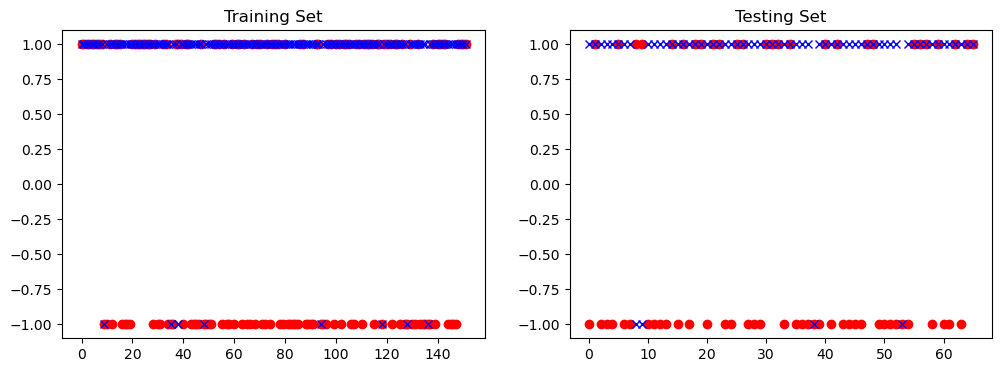

In [159]:
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, t_train)

train_score = svm.score(X_train, t_train)
test_score = svm.score(X_test, t_test)

svm_train = svm.predict(X_train)
svm_test = svm.predict(X_test)

print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}")
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(t_train, 'ro')
plt.plot(svm_train, 'bx')
plt.title("Training Set")

plt.subplot(122)
plt.plot(t_test, 'ro')
plt.plot(svm_test, 'bx')
plt.title("Testing Set")

plt.show


In [160]:
#svm_predict_original = svm.predict(X)
X['predicted_svm'] = svm.predict(X)
cal_daily_close = X['Close'].pct_change()
cal_daily_close.cumsum()

Date
2017-01-03         NaN
2017-01-04    0.035256
2017-01-05   -0.004991
2017-01-06    0.018665
2017-01-09   -0.000243
                ...   
2017-11-06   -0.091074
2017-11-07   -0.109740
2017-11-08   -0.115175
2017-11-09   -0.096050
2017-11-10   -0.124200
Name: Close, Length: 218, dtype: float64

In [161]:
cal_daily_open = X['Open'].pct_change()
cal_daily_open

Date
2017-01-03         NaN
2017-01-04    0.045708
2017-01-05   -0.034115
2017-01-06    0.024283
2017-01-09   -0.009698
                ...   
2017-11-06    0.025605
2017-11-07    0.047157
2017-11-08   -0.034437
2017-11-09   -0.006859
2017-11-10    0.026243
Name: Open, Length: 218, dtype: float64

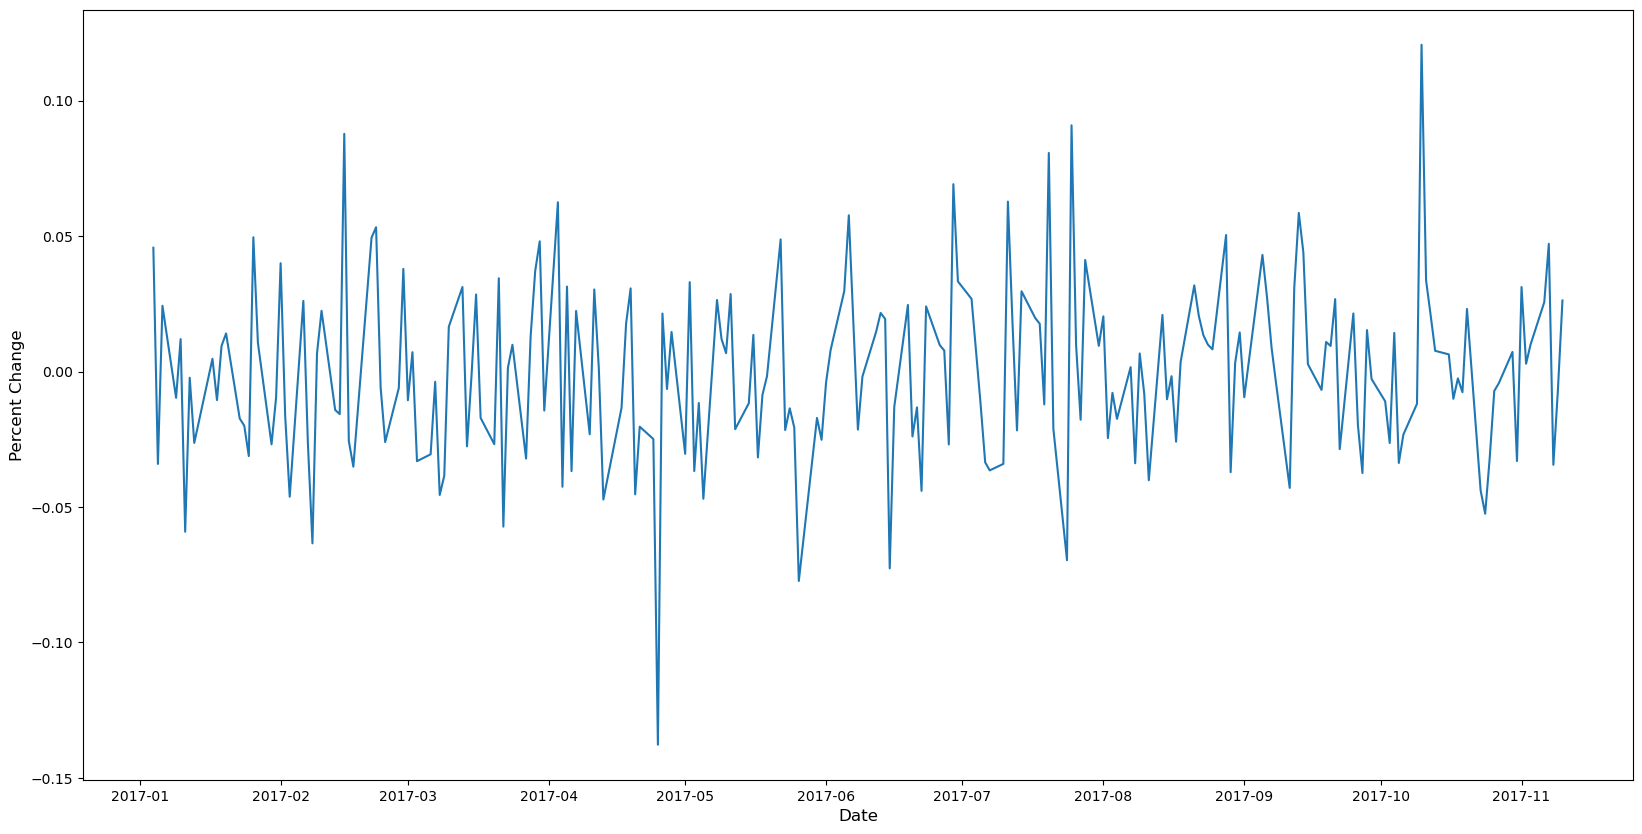

In [162]:
plt.figure(figsize=(20,10))
plt.xlabel("Date", fontsize=12)
plt.ylabel("Percent Change", fontsize=12)
plt.plot(cal_daily_open)

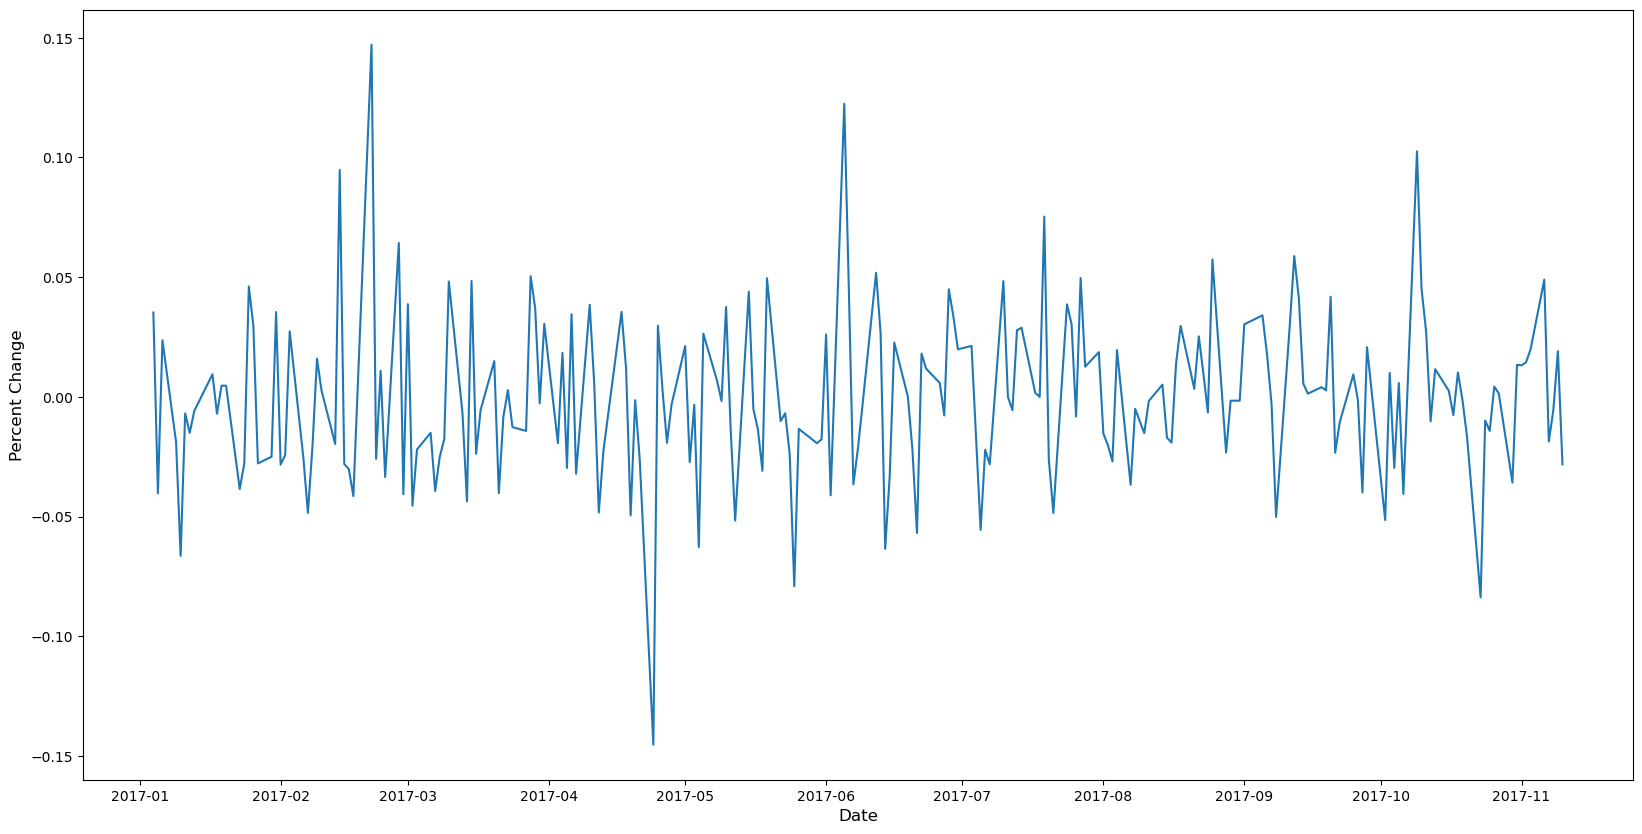

In [163]:
plt.figure(figsize=(20,10))
plt.xlabel("Date", fontsize=12)
plt.ylabel("Percent Change", fontsize=12)
plt.plot(cal_daily_close)

In [164]:
cal_return = cal_daily_close.cumsum()
cal_return

Date
2017-01-03         NaN
2017-01-04    0.035256
2017-01-05   -0.004991
2017-01-06    0.018665
2017-01-09   -0.000243
                ...   
2017-11-06   -0.091074
2017-11-07   -0.109740
2017-11-08   -0.115175
2017-11-09   -0.096050
2017-11-10   -0.124200
Name: Close, Length: 218, dtype: float64

In [165]:
X['predicted_svm']

Date
2017-01-03    1
2017-01-04    1
2017-01-05   -1
2017-01-06   -1
2017-01-09   -1
             ..
2017-11-06    1
2017-11-07    1
2017-11-08    1
2017-11-09    1
2017-11-10    1
Name: predicted_svm, Length: 218, dtype: int32

In [166]:
X['Close']

Date
2017-01-03    9.36
2017-01-04    9.69
2017-01-05    9.30
2017-01-06    9.52
2017-01-09    9.34
              ... 
2017-11-06    7.50
2017-11-07    7.36
2017-11-08    7.32
2017-11-09    7.46
2017-11-10    7.25
Name: Close, Length: 218, dtype: float64

In [167]:
cal_predicted_return = X['Close'] * svm_predict_original
cal_predicted_return

Date
2017-01-03    9.36
2017-01-04    9.69
2017-01-05   -9.30
2017-01-06   -9.52
2017-01-09   -9.34
              ... 
2017-11-06    7.50
2017-11-07    7.36
2017-11-08    7.32
2017-11-09    7.46
2017-11-10    7.25
Name: Close, Length: 218, dtype: float64

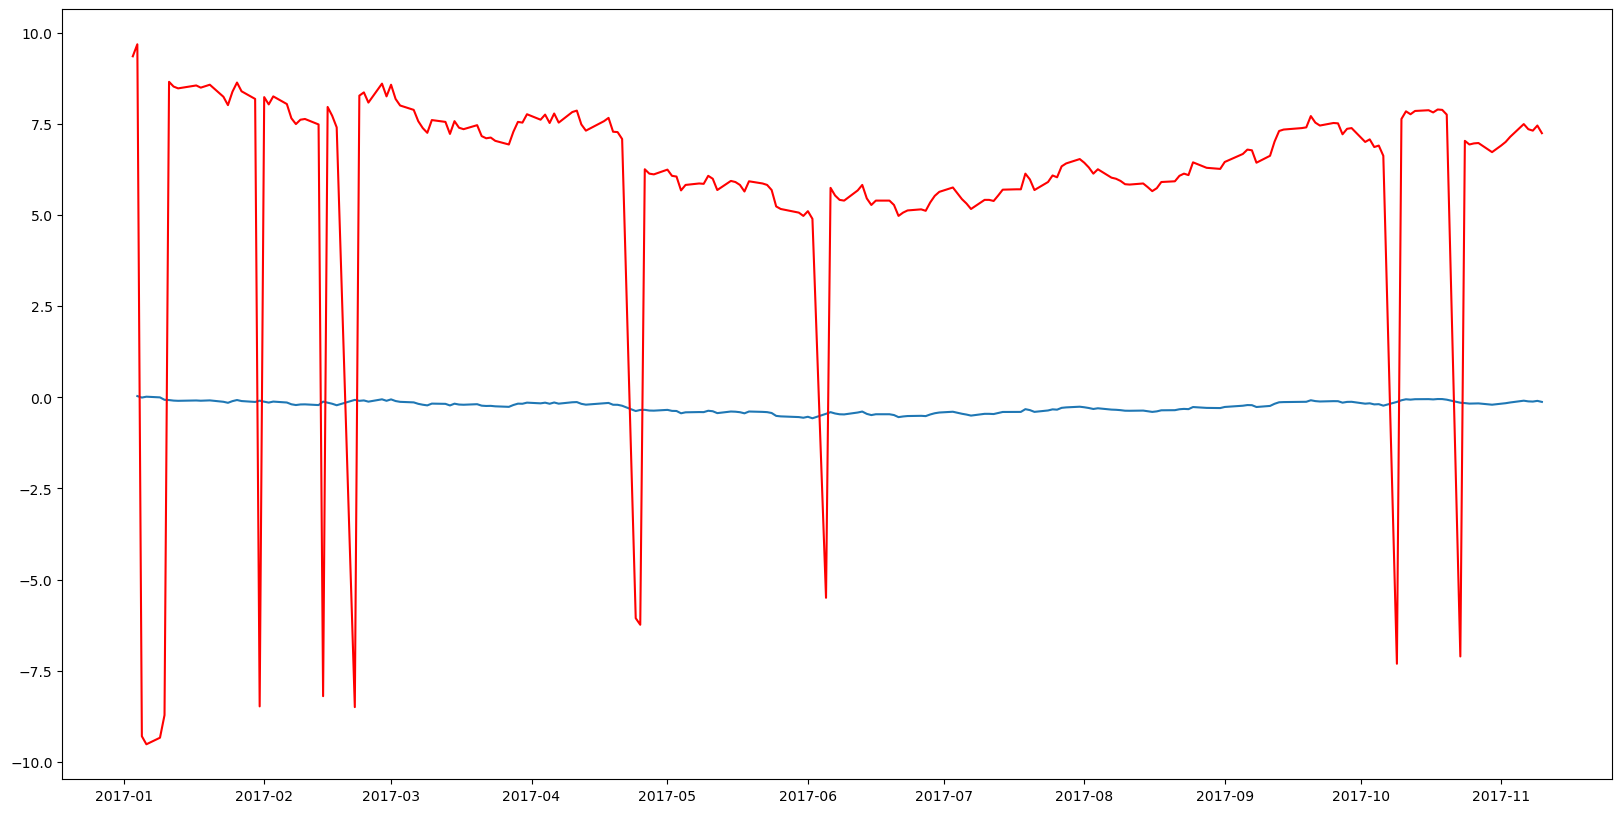

In [168]:
plt.figure(figsize=(20,10))
plt.plot(cal_return)
plt.plot(cal_predicted_return, color='red')

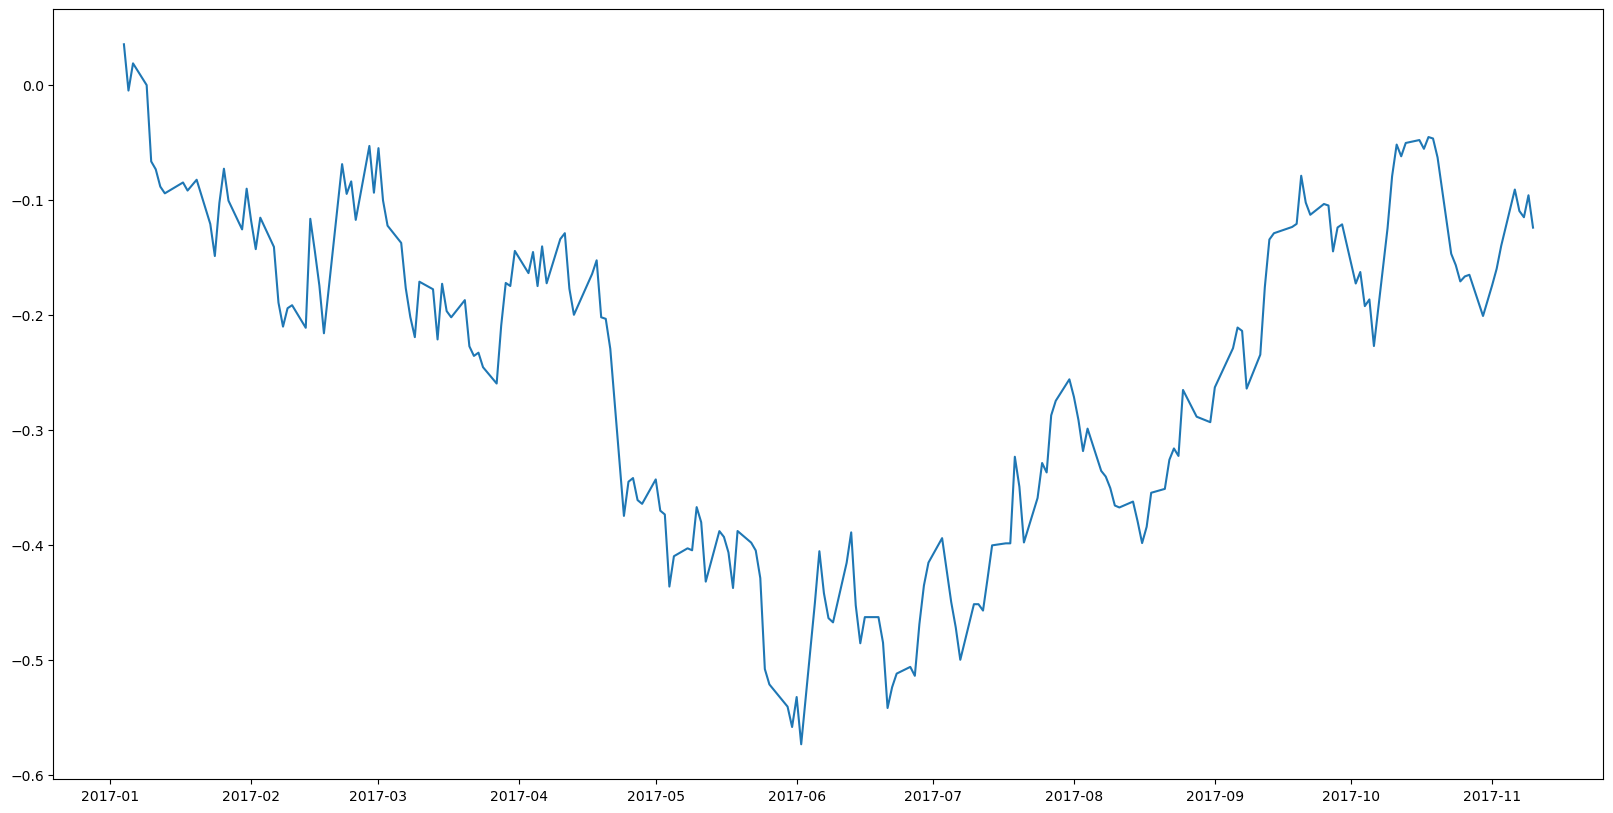

In [169]:
plt.figure(figsize=(20,10))
plt.plot(cal_return)


In [170]:
cal_predicted_return = X['predicted_svm']
cal_predicted_return

Date
2017-01-03    1
2017-01-04    1
2017-01-05   -1
2017-01-06   -1
2017-01-09   -1
             ..
2017-11-06    1
2017-11-07    1
2017-11-08    1
2017-11-09    1
2017-11-10    1
Name: predicted_svm, Length: 218, dtype: int32

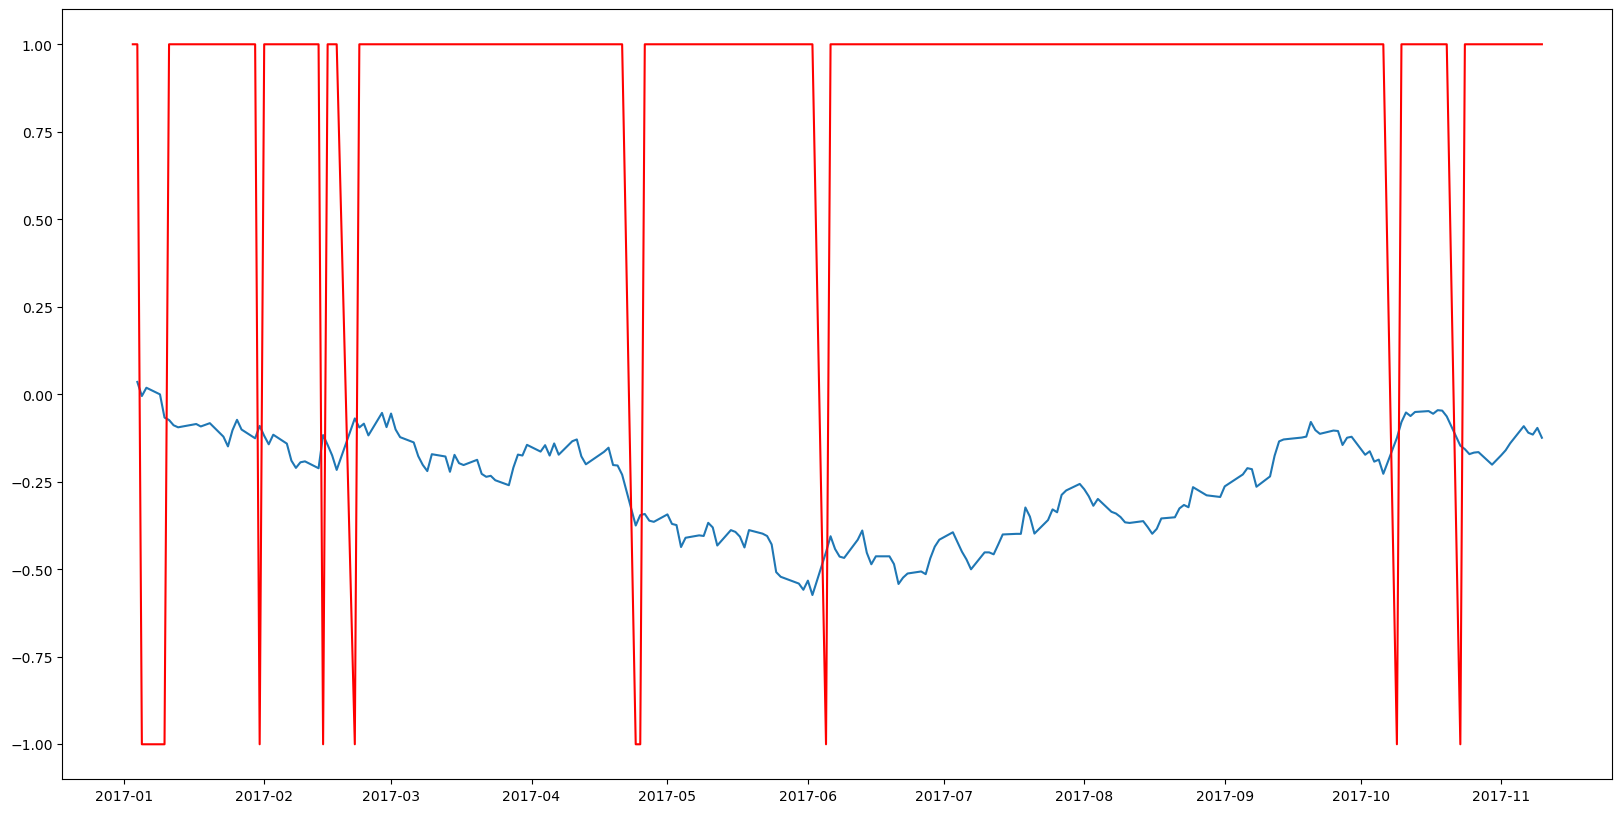

In [171]:
plt.figure(figsize=(20,10))
plt.plot(cal_return)
plt.plot(cal_predicted_return, color='red')

In [172]:
cal2_original = X['Close'].pct_change() 
cal2_original

Date
2017-01-03         NaN
2017-01-04    0.035256
2017-01-05   -0.040248
2017-01-06    0.023656
2017-01-09   -0.018908
                ...   
2017-11-06    0.048951
2017-11-07   -0.018667
2017-11-08   -0.005435
2017-11-09    0.019126
2017-11-10   -0.028150
Name: Close, Length: 218, dtype: float64

In [173]:
cal2_predicted =  X['Close'].pct_change() * X['predicted_svm']

cal2_predicted


Date
2017-01-03         NaN
2017-01-04    0.035256
2017-01-05    0.040248
2017-01-06   -0.023656
2017-01-09    0.018908
                ...   
2017-11-06    0.048951
2017-11-07   -0.018667
2017-11-08   -0.005435
2017-11-09    0.019126
2017-11-10   -0.028150
Length: 218, dtype: float64

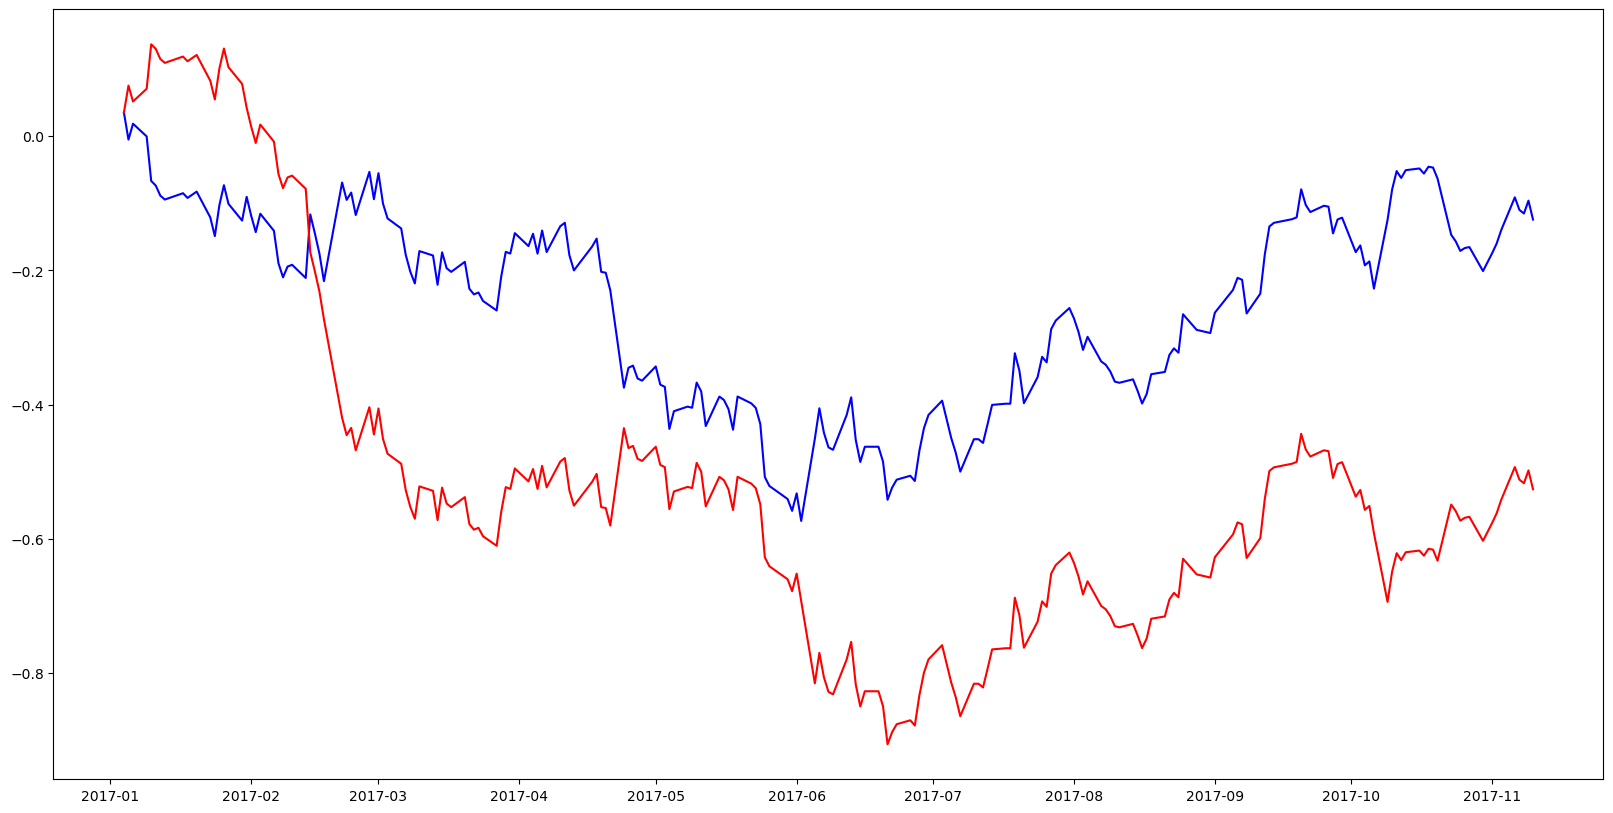

In [174]:
plt.figure(figsize=(20,10))
plt.plot(cal2_original.cumsum(), color='blue')
plt.plot(cal2_predicted.cumsum(), color='red')